<a href="https://colab.research.google.com/github/ShanRinna/DL3/blob/main/ANN_gression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [3]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE
    
# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator
    
    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [4]:
#load data(sometimes need to use "/")
df = pd.read_csv('/content/House_Rent_Dataset.csv') #y:連續變數
df

,Rent,Size,BHK,Bathroom,Furnishing Status,City
0,10000,1100,2,2,Unfurnished,Kolkata
1,20000,800,2,1,Semi-Furnished,Kolkata
2,17000,1000,2,1,Semi-Furnished,Kolkata
3,10000,800,2,1,Unfurnished,Kolkata
4,7500,850,2,1,Unfurnished,Kolkata
...,...,...,...,...,...,...
4741,15000,1000,2,2,Semi-Furnished,Hyderabad
4742,29000,2000,3,3,Semi-Furnished,Hyderabad
4743,35000,1750,3,3,Semi-Furnished,Hyderabad
4744,45000,1500,3,2,Semi-Furnished,Hyderabad


In [5]:
# 1.1 Easiest way to check data type and if there are any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rent               4746 non-null   int64 
 1   Size               4746 non-null   int64 
 2   BHK                4746 non-null   int64 
 3   Bathroom           4746 non-null   int64 
 4   Furnishing Status  4746 non-null   object
 5   City               4746 non-null   object
dtypes: int64(4), object(2)
memory usage: 222.6+ KB


In [6]:
# 1.2 When using the describe function in default, pandas automatically selects the numerical columns
df.describe()

,Rent,Size,BHK,Bathroom
count,4.746000e+03,4746.000000,4746.000000,4746.000000
mean,3.499345e+04,967.490729,2.083860,1.965866
std,7.810641e+04,634.202328,0.832256,0.884532
min,1.200000e+03,10.000000,1.000000,1.000000
25%,1.000000e+04,550.000000,2.000000,1.000000
50%,1.600000e+04,850.000000,2.000000,2.000000
75%,3.300000e+04,1200.000000,3.000000,2.000000
max,3.500000e+06,8000.000000,6.000000,10.000000


In [7]:
# 1.3 Using value_counts function to count frequency in categorical column
print(df[['Furnishing Status']].value_counts(sort=True))
print('+-----------------------+')
print(df[['City']].value_counts(sort=True))
print('+-----------------------+')

Furnishing Status
Semi-Furnished       2251
Unfurnished          1815
Furnished             680
dtype: int64
+-----------------------+
City     
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
dtype: int64
+-----------------------+


In [8]:
#2.1 Using pd.get_dummies function to generate dummies
dummied_df=pd.get_dummies(df,columns=['Furnishing Status','City'])
dummied_df

,Rent,Size,BHK,Bathroom,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,10000,1100,2,2,0,0,1,0,0,0,0,1,0
1,20000,800,2,1,0,1,0,0,0,0,0,1,0
2,17000,1000,2,1,0,1,0,0,0,0,0,1,0
3,10000,800,2,1,0,0,1,0,0,0,0,1,0
4,7500,850,2,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,15000,1000,2,2,0,1,0,0,0,0,1,0,0
4742,29000,2000,3,3,0,1,0,0,0,0,1,0,0
4743,35000,1750,3,3,0,1,0,0,0,0,1,0,0
4744,45000,1500,3,2,0,1,0,0,0,0,1,0,0


In [9]:
# Export to CSV file Note: preset folder path is required
dummied_df.to_csv('/content/sample_data/House_Rent_Dataset.csv',index=False, header=True)
# Colab
#dummied_new_df.to_csv('House_Rent_dummied.csv',index=False, header=True)
print('Export complete...')

Export complete...


In [10]:
#set x (make prediction) with minimax
x=dummied_df.drop(['Rent'],axis=1).copy()  #training:模型內部評估testing:跨模型評估(選模)

#set y (want to predict)
y=dummied_df['Rent'].copy()

In [11]:
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(x)
scaled_x=pd.DataFrame(data=scaling)
scaled_x.columns=x.columns
scaled_x.head()

,Size,BHK,Bathroom,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0.136421,0.2,0.111111,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.098874,0.2,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.123905,0.2,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.098874,0.2,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.105131,0.2,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
#Split the data (split into 80% training data & 20% testing data) (lock seed)
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=5)

In [13]:
print('Amount of training samples:',len(y_train))
print('+----------------------------------------+')
print('Amount of testing samples:',len(y_test))

Amount of training samples: 3796
+----------------------------------------+
Amount of testing samples: 950


In [14]:
# Quick recap: Total of 12 features in the data set
scaled_x.head()

,Size,BHK,Bathroom,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0.136421,0.2,0.111111,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.098874,0.2,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.123905,0.2,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.098874,0.2,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.105131,0.2,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Tips: Using shape to call the amount of features in the data set 
input_features=scaled_x.shape[1]
print('Amount of features:',input_features) #12個x，features decide layers

Amount of features: 12


In [16]:
from keras.losses import mse
from keras.backend import sqrt #loss function can choose，RMSE使值域較小

def my_RMSE(y_true, y_pred):
    return sqrt(mse(y_true, y_pred))

# Register custom object
#from keras.utils.generic_utils import get_custom_objects for pc
from tensorflow.keras.saving import get_custom_objects #keras has to login
get_custom_objects().update({'my_RMSE': my_RMSE}) #my_RMSE 自定，後面用此可呼叫出

In [ ]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu')) #12 features

# 6.3 Add second hidden layer
model.add(Dense(units=48, activation='relu')) #上一層兩倍

# 6.3 Add third hidden layer
model.add(Dense(units=192, activation='relu')) #上一層兩倍

# 6.5 Add output layer
model.add(Dense(units=1, activation='linear'))

# 6.6 Compile the defined Net
#opt=SGD(learning_rate=0.01,momentum=0.9)

opt=Adam(learning_rate=0.01,beta_1=0.9) #adem為主，可改 l.r b_1:改
model.compile(loss='my_RMSE', optimizer=opt, metrics=['MAPE']) #loss會照設定跑

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 192)               9408      
                                                                 
 dense_3 (Dense)             (None, 1)                 193       
                                                                 
Total params: 11,113
Trainable params: 11,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)

# 7.1 Store in the history for more useful information
history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation)) #因為y是連續，所以指標適用loss


Epoch 1/100
48/48 [==============================] - 1s 8ms/step - loss: 31660.7949 - MAPE: 84.2494 - val_loss: 26799.6387 - val_MAPE: 88.5176
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 21865.0000 - MAPE: 54.9659 - val_loss: 20329.7500 - val_MAPE: 44.1055
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 18121.2695 - MAPE: 44.6478 - val_loss: 17847.0762 - val_MAPE: 40.1601
Epoch 4/100
48/48 [==============================] - 0s 4ms/step - loss: 17114.2695 - MAPE: 42.4906 - val_loss: 17095.9883 - val_MAPE: 34.9940
Epoch 5/100
48/48 [==============================] - 0s 4ms/step - loss: 16033.7314 - MAPE: 39.7345 - val_loss: 15399.6670 - val_MAPE: 35.7015
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 15126.2520 - MAPE: 38.4374 - val_loss: 14426.8252 - val_MAPE: 32.2757
Epoch 7/100
48/48 [==============================] - 0s 4ms/step - loss: 14442.4795 - MAPE: 36.4509 - val_loss: 13632.3193 - val_MAPE: 34.2094

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'MAPE', 'val_loss', 'val_MAPE'])

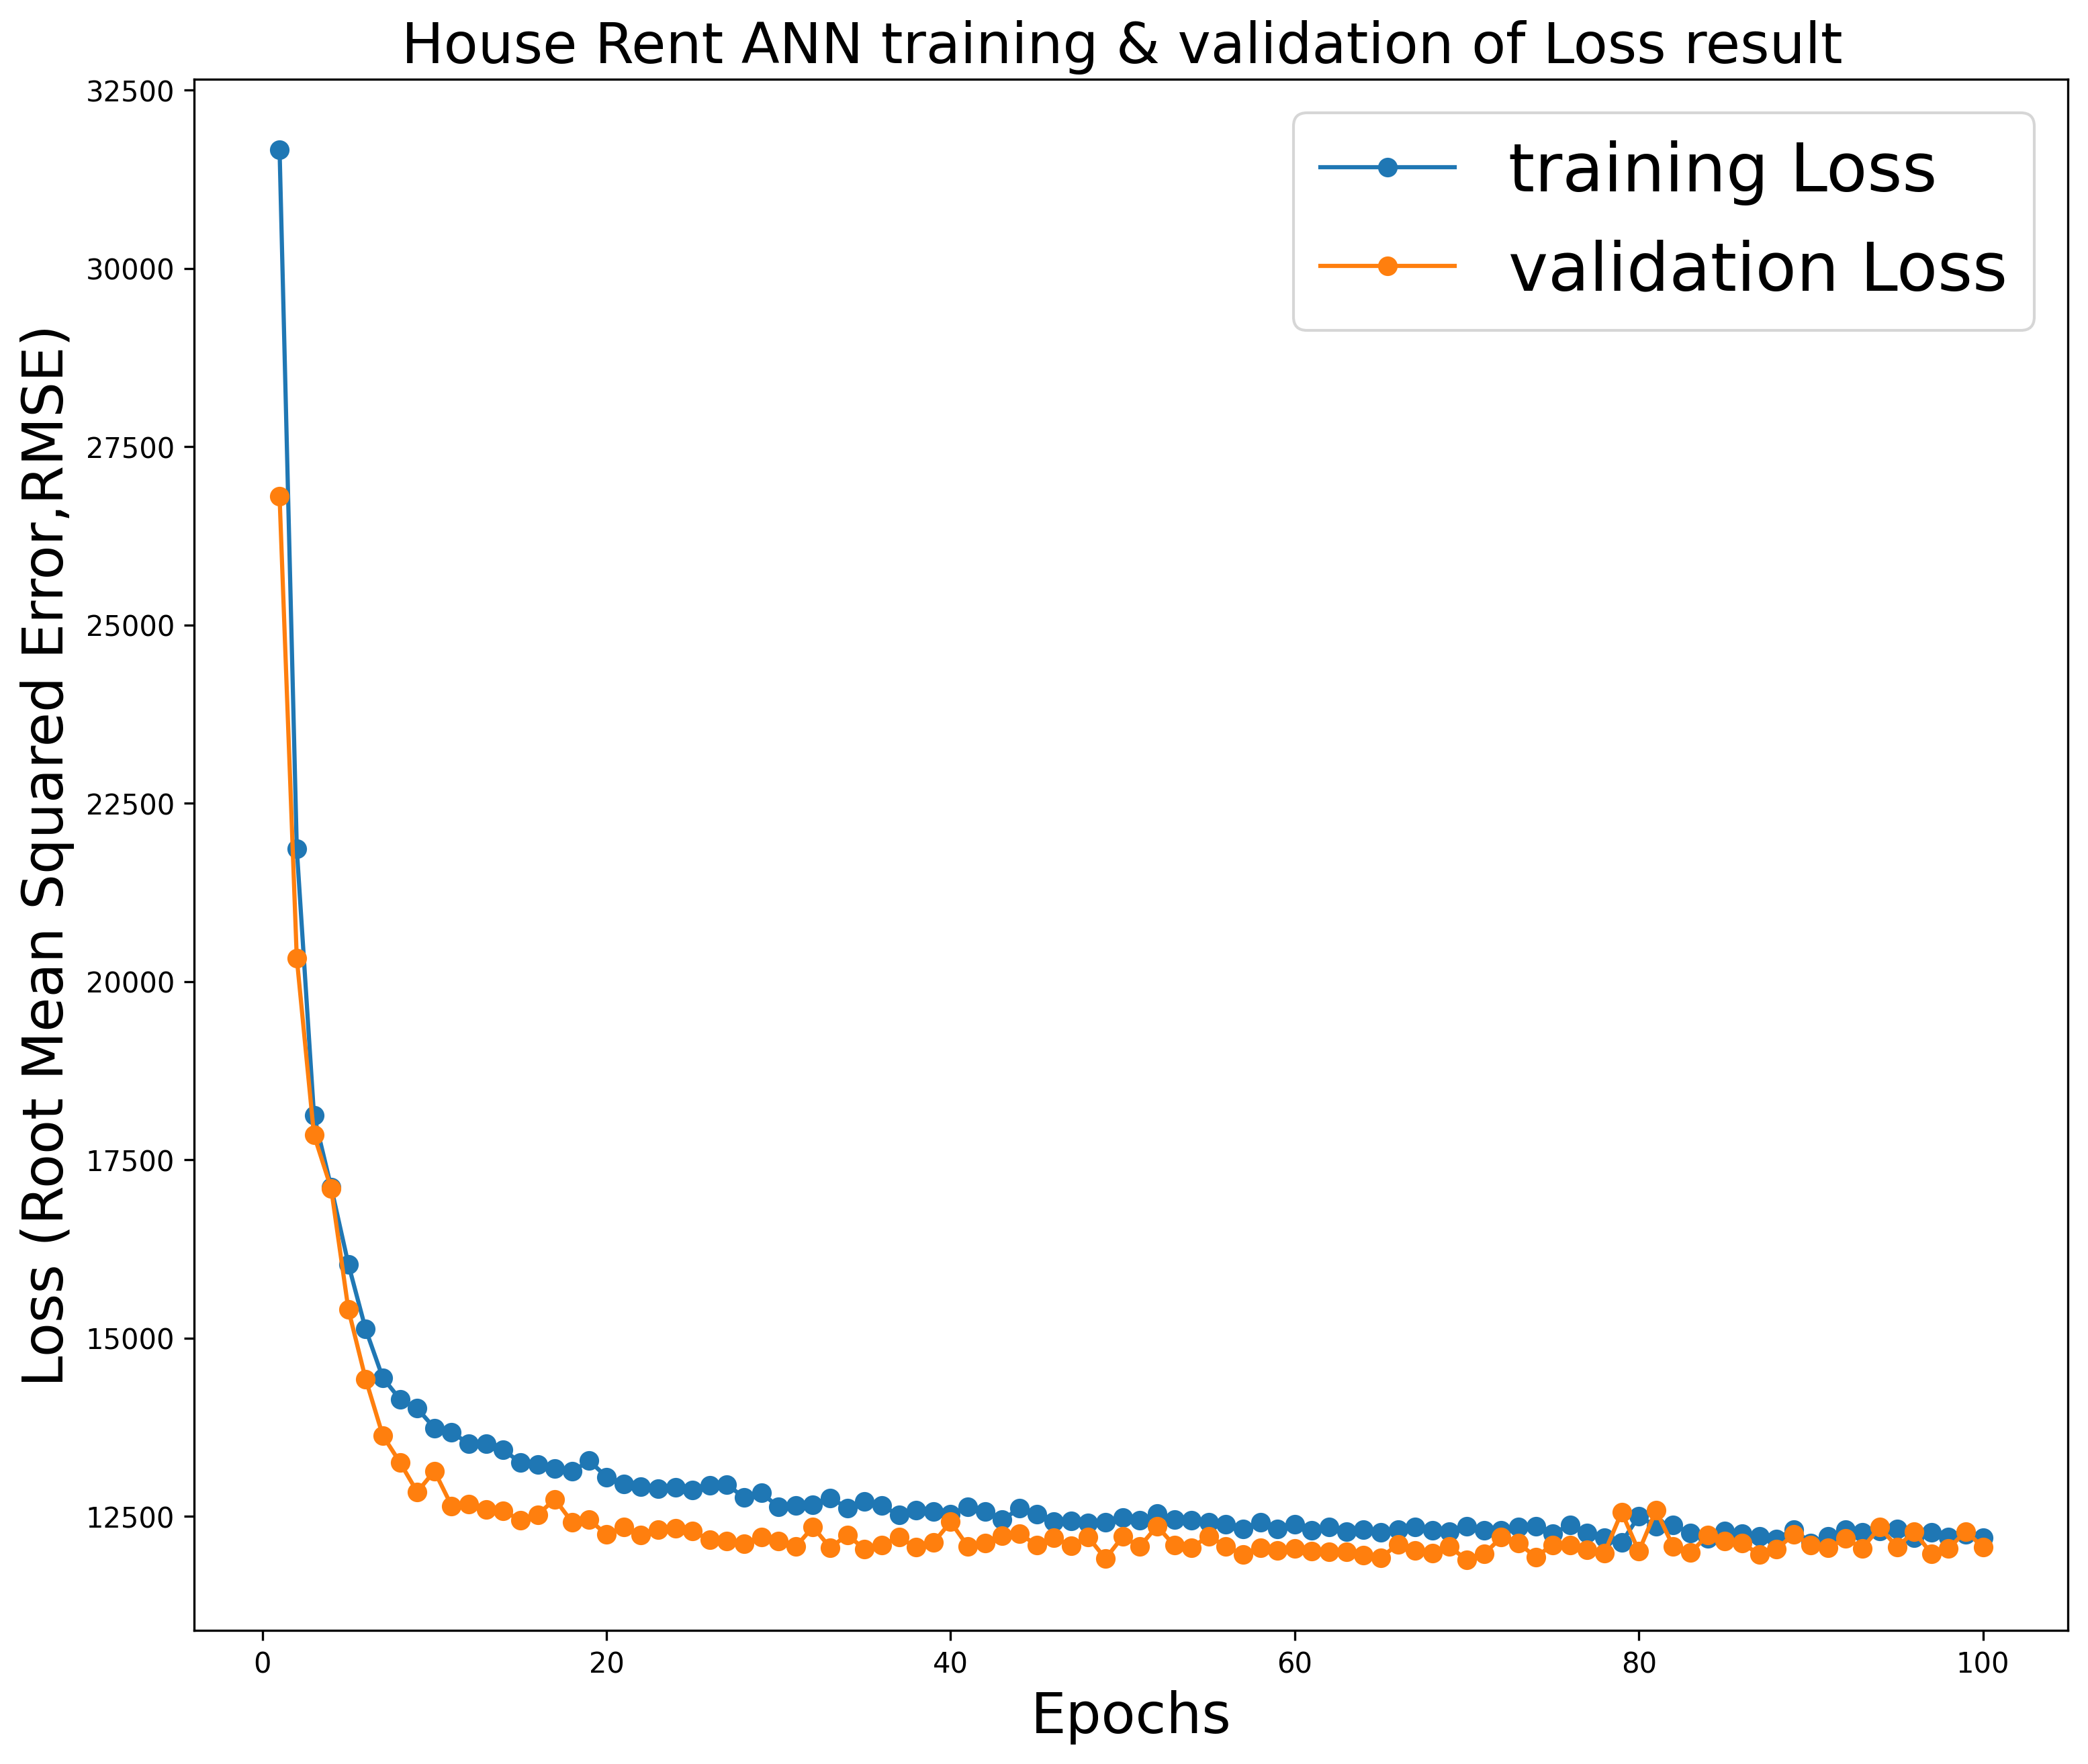

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('House Rent ANN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

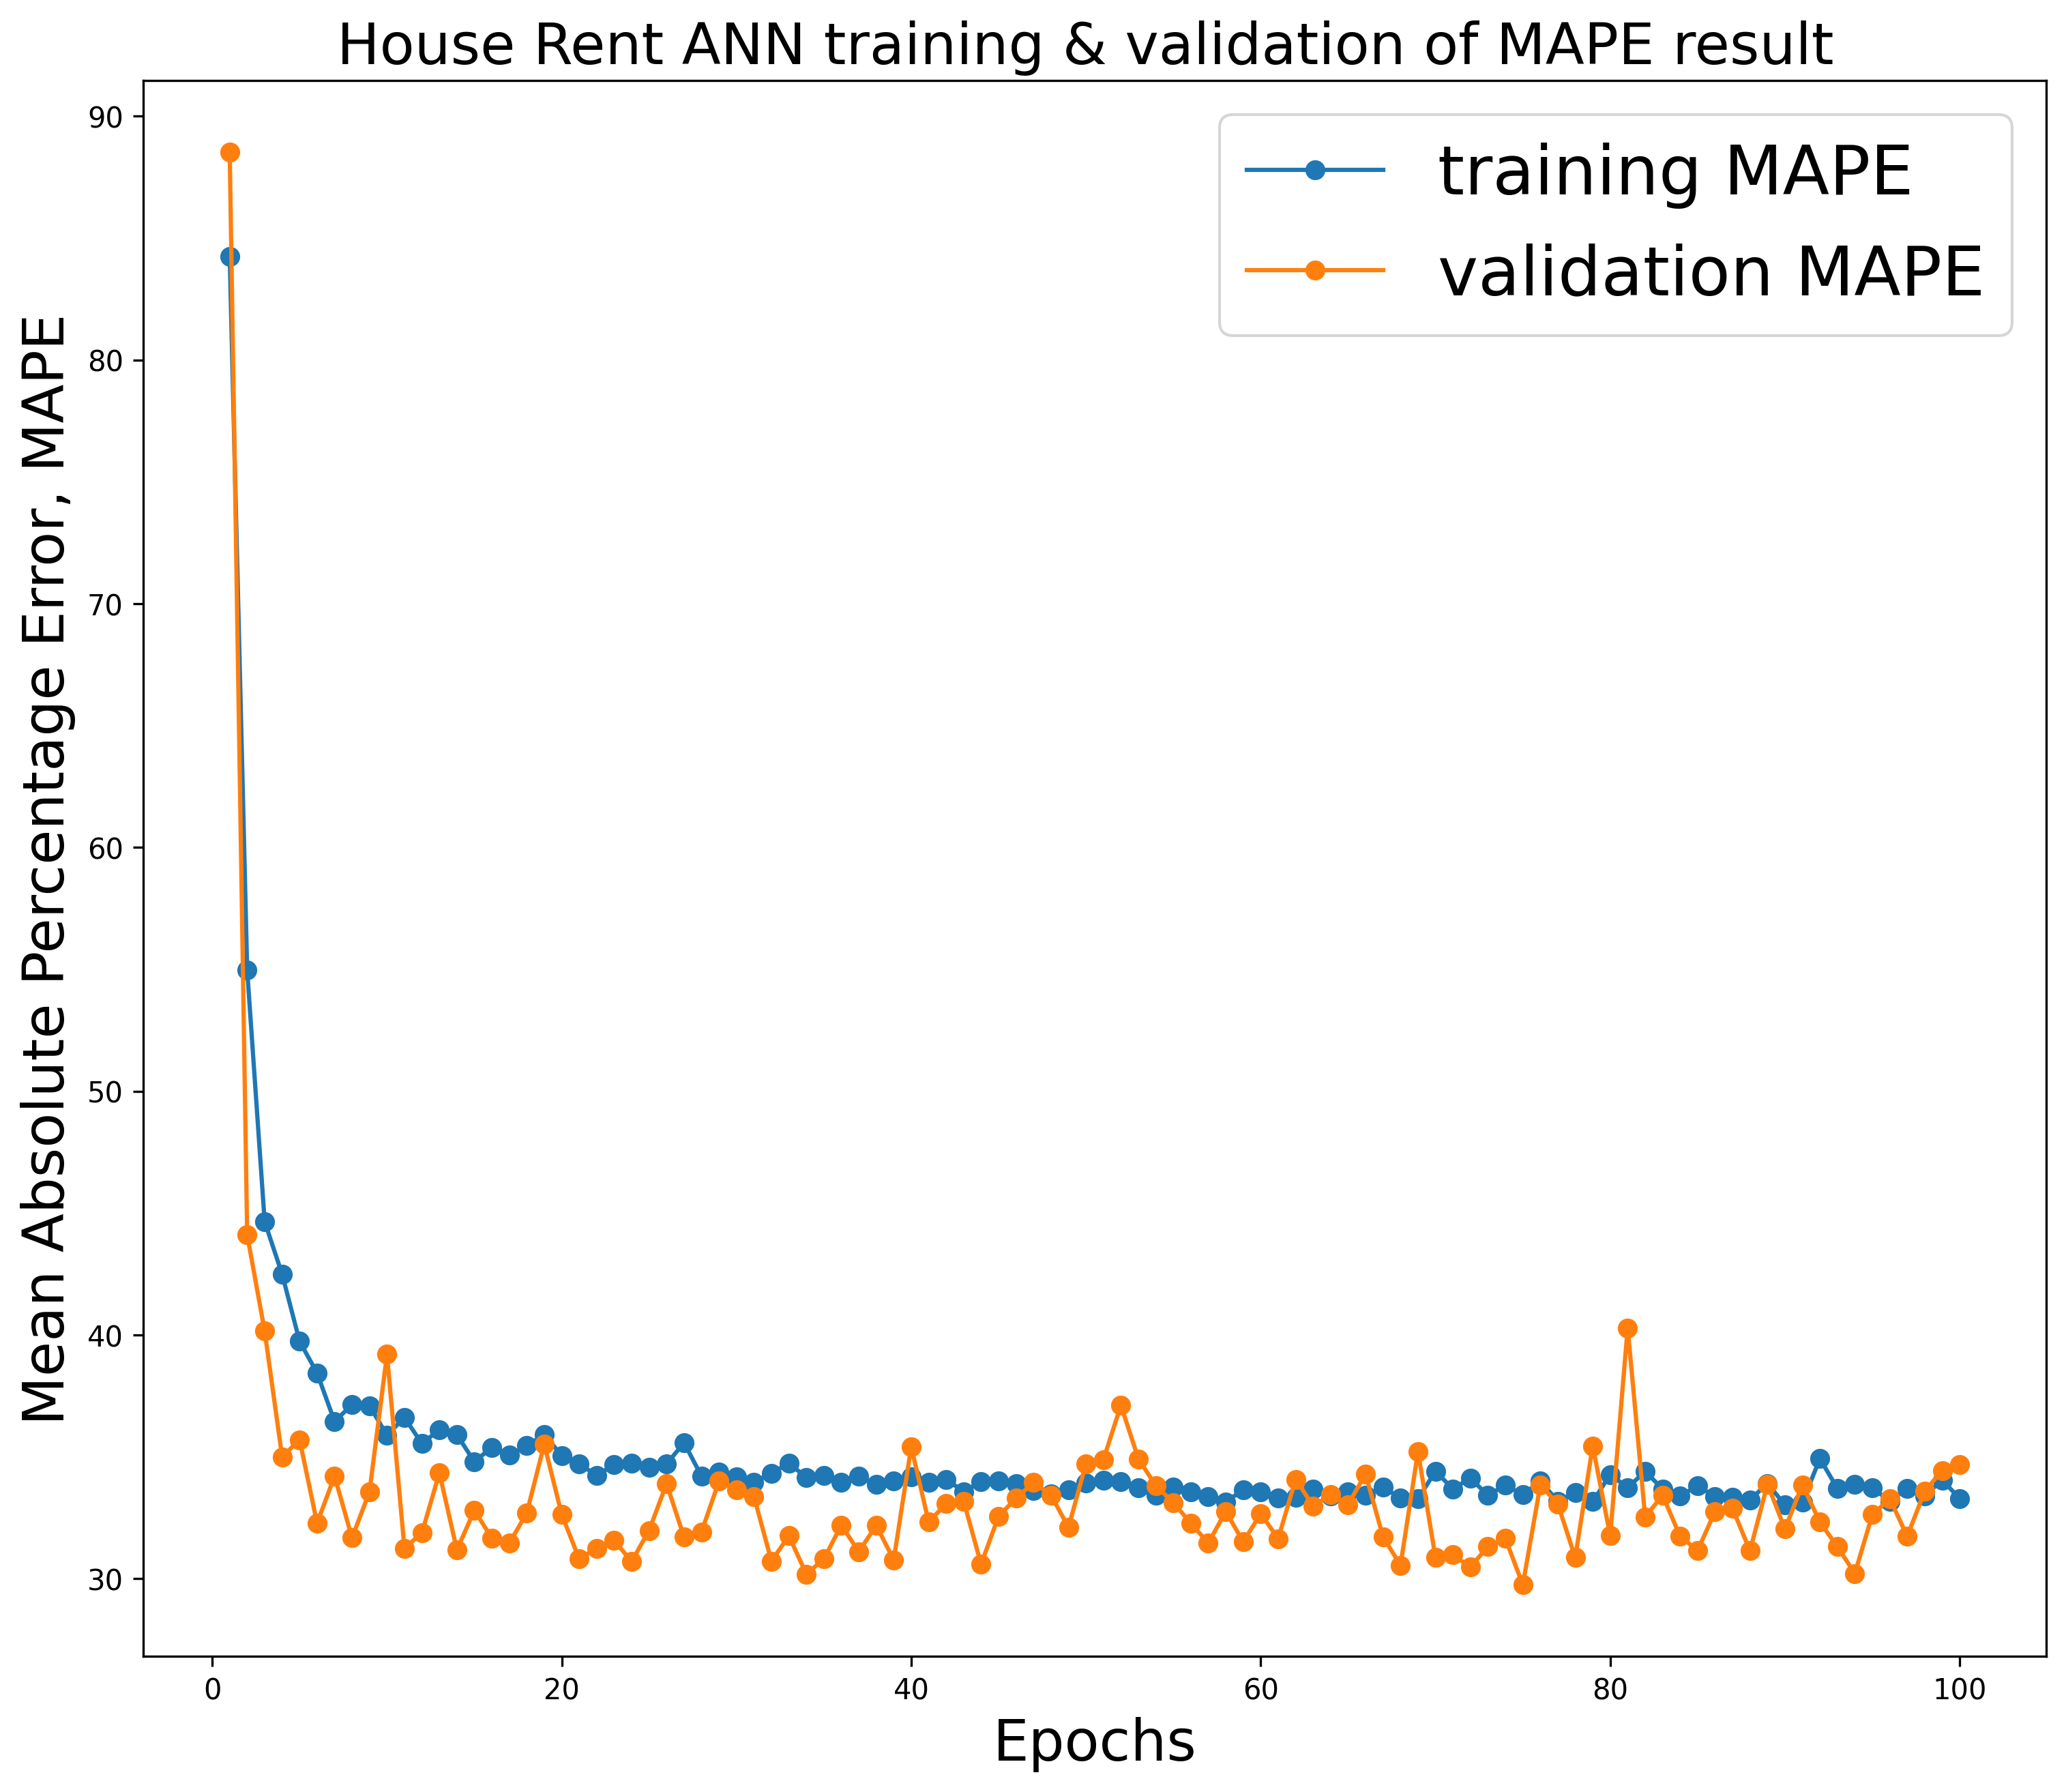

In [ ]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['MAPE']
val_acc_values=modeling_result['val_MAPE']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Mean Absolute Percentage Error, MAPE',fontsize=20)
plt.title('House Rent ANN training & validation of MAPE result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training MAPE')
plt.plot(epochs, val_acc_values,marker='o',label='validation MAPE')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:
# 7.3 Save the trained model

model.save('/content/sample_data/House_Rent_ANN_trained_model.h5')
# Colab
#model.save('House_Rent_ANN_trained_model.h5')
print('Model has been saved...')

Model has been saved...


In [ ]:
# 7.4 Restore the saved model for testing
ANN_model=keras.models.load_model('/content/sample_data/House_Rent_ANN_trained_model.h5')
# Colab
#ANN_model=keras.models.load_model('')
print('Model successfully loaded...')

Model successfully loaded...


In [ ]:
# 8.1 Make prediction #轉成一維
prediction=np.round(ANN_model.predict_on_batch(x_test),0)
prediction=prediction.astype('int')
pred_values=[]
for i in range(0,len(prediction)):
    value=prediction[i][0]
    pred_values.append(value)

In [ ]:
Results=pd.DataFrame({'Num':range(1,len(prediction)+1),'Y_true':y_test,'Predict':pred_values})
Results['abs Error']=np.abs(Results['Y_true']-Results['Predict'])
Results

,Num,Y_true,Predict,abs Error
526,1,45000,37482,7518
2394,2,90000,63351,26649
1790,3,17000,12969,4031
1225,4,21000,41924,20924
3668,5,18000,14719,3281
...,...,...,...,...
4707,946,25000,12821,12179
4393,947,13000,20353,7353
2345,948,11000,10356,644
3675,949,8200,13508,5308


In [ ]:
MAE=mean_absolute_error(y_test,pred_values)
MSE=mean_squared_error(y_test,pred_values,squared=True)
RMSE=mean_squared_error(y_test,pred_values,squared=False)
MAPE=mean_absolute_percentage_error(y_test,pred_values)
SMAPE=SMAPE_calulate(y_test,pred_values)
RAE=RAE_calculate(y_test,pred_values)
MRAE=MRAE_calculate(y_test,pred_values)
MdRAE=MdRAE_calculate(y_test,pred_values)
RSE=RSE_calculate(y_test,pred_values,Root=False)
RRSE=RSE_calculate(y_test,pred_values,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 10834.357
MSE: 774747785.763
RMSE: 27834.292
MAPE: 33.765 %
SMAPE: 29.873 %
RAE: 0.416
MRAE: 0.0004375356196582781
MdRAE: 0.204 bench: 31476.68
RSE: 0.351
RRSE: 0.592


In [ ]:
# Figure setting
plt.figure(figsize=(30,8),dpi=600)
plt.title('True value vs Predict value',weight='bold',fontsize=36)
plt.xlabel('Observations',fontsize=24,weight='bold')
plt.ylabel('Value',fontsize=24,weight='bold')

# Scatter plot
plt.scatter(Results.iloc[:,0],Results.iloc[:,1],color='blue',label='Y_true')
plt.scatter(Results.iloc[:,0],Results.iloc[:,2],color='red',label='Y_pred')

# Figure setting
plt.legend(loc=1,fontsize=24)
# Set x-axis to let the plot looks nice
plt.xlim(-50,1000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

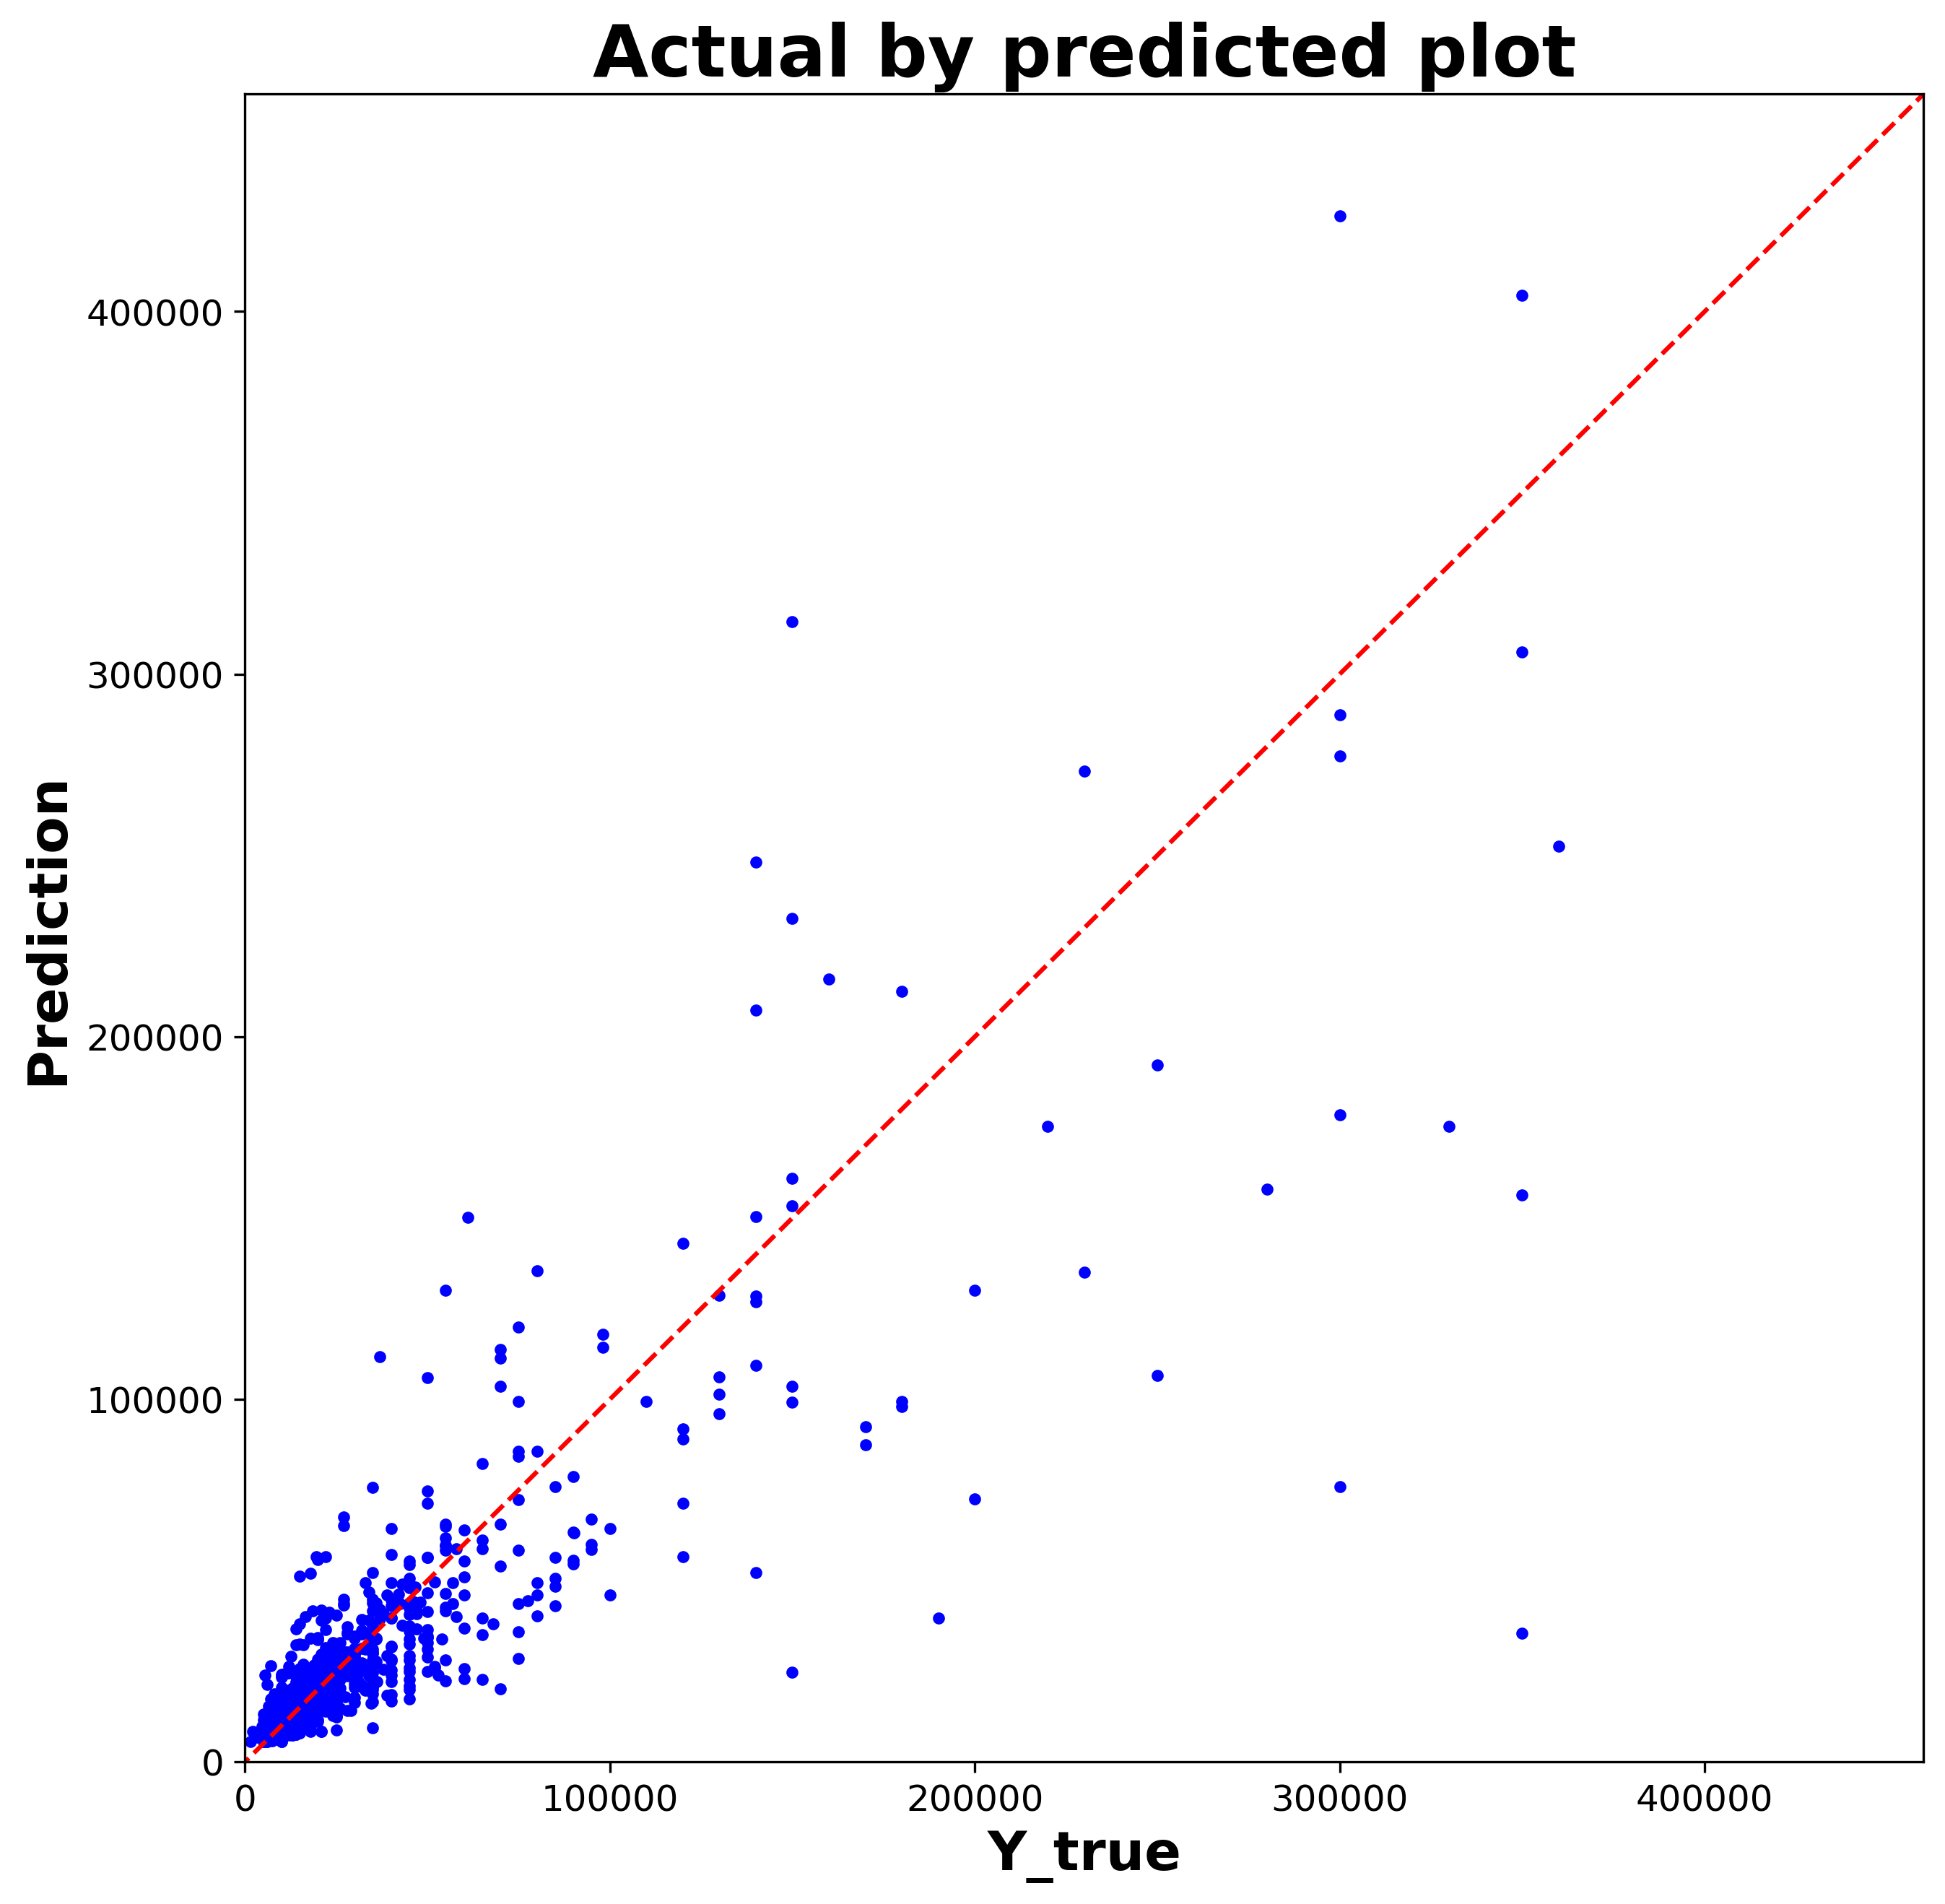

In [ ]:
# Lock the scale of axis by Y_true
max_value=max(y_test)+100000 #鎖死值域
min_value=min(y_test)-100000

# Figure setting
plt.figure(figsize=(10,10),dpi=300)
plt.title('Actual by predicted plot',weight='bold',fontsize=24)
plt.xlabel('Y_true',fontsize=18,weight='bold')
plt.ylabel('Prediction',fontsize=18,weight='bold')

# Perfect model reference line
plt.plot([min_value,max_value], [min_value,max_value], linestyle='--',color='red')

# Actual by predicted plot
plt.scatter(Results.iloc[:,1],Results.iloc[:,2],marker='.',color='blue')

# Set the axis
plt.ylim(0,max_value)
plt.xlim(0,max_value)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

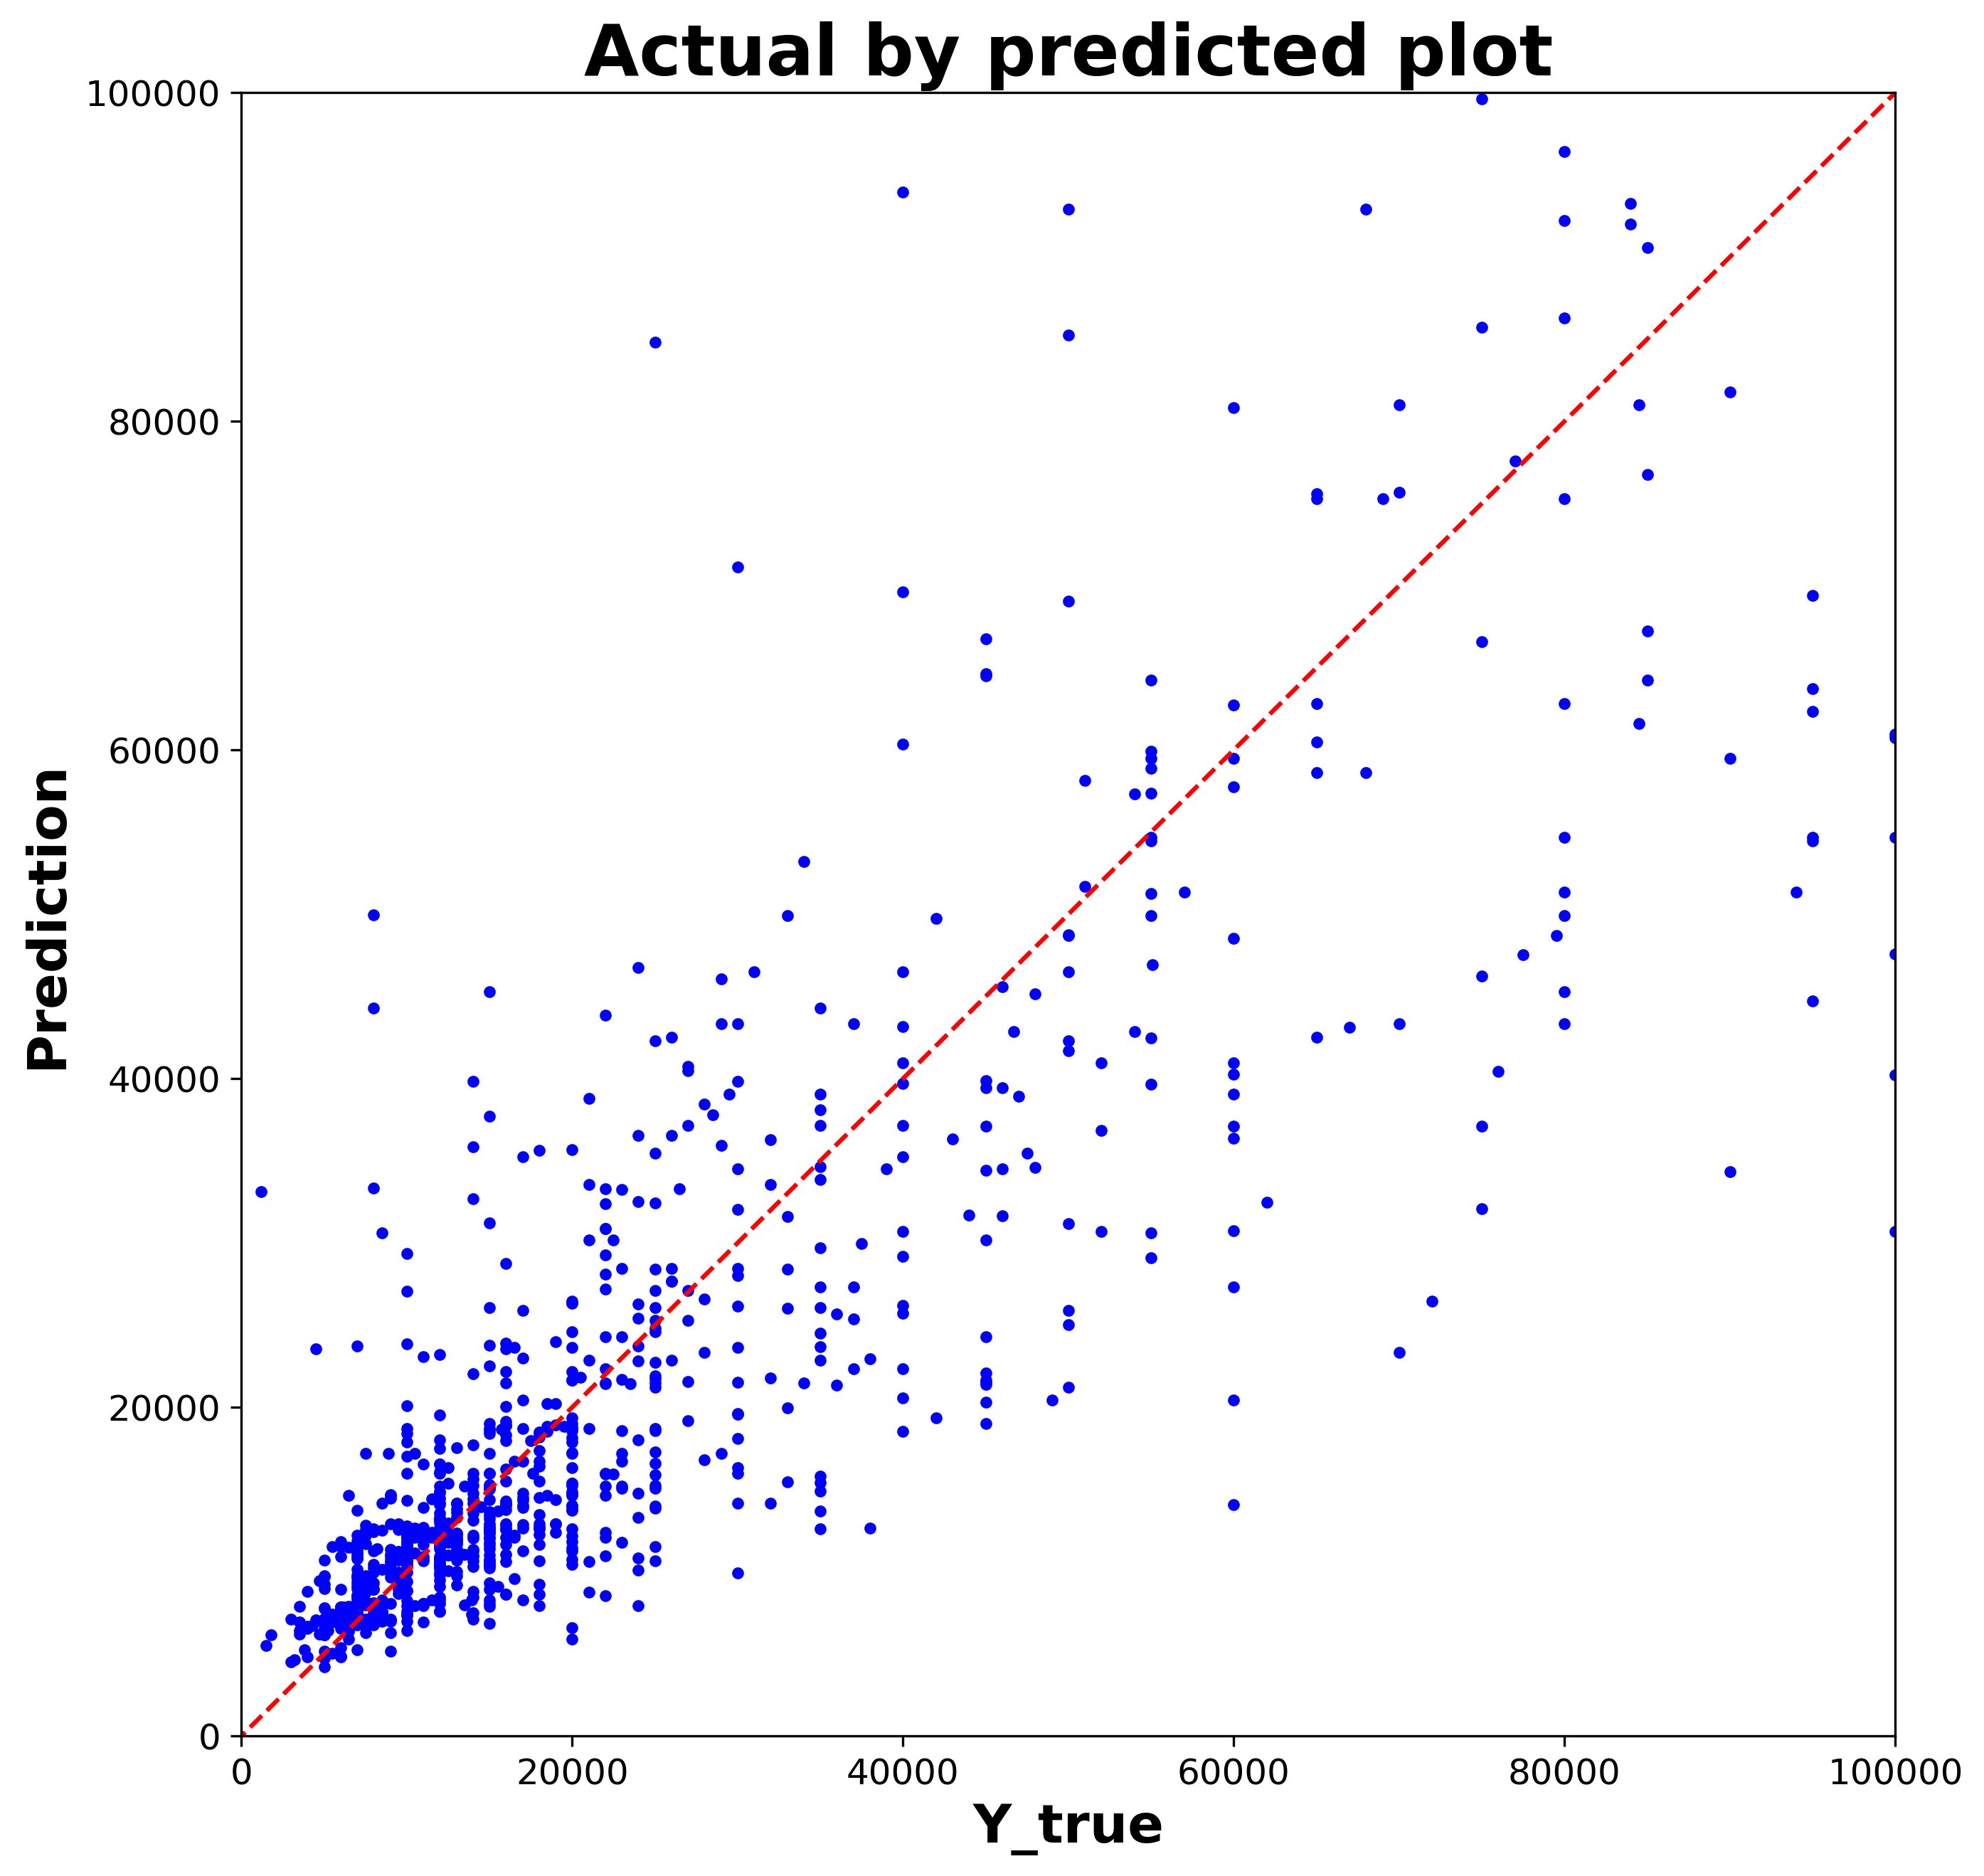

In [ ]:
max_value=max(y_test)+100000
min_value=min(y_test)-100000

plt.figure(figsize=(10,10),dpi=300)
plt.title('Actual by predicted plot',weight='bold',fontsize=24)
plt.xlabel('Y_true',fontsize=18,weight='bold')
plt.ylabel('Prediction',fontsize=18,weight='bold')
plt.plot([min_value,max_value], [min_value,max_value], linestyle='--',color='red')
plt.scatter(Results.iloc[:,1],Results.iloc[:,2],marker='.',color='blue')

#plt.legend(loc=1,fontsize=18)
plt.ylim(0,100000)
plt.xlim(0,100000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# 6.1 Create the model
clear.clear_session()
model2=Sequential()

# 6.2 Add input layer & first hidden layer
model2.add(Dense(units=24, input_dim=12, activation='relu')) #12 features

# 6.3 Add second hidden layer
model2.add(Dense(units=48, activation='relu')) #上一層兩倍

# 6.4 Add third hidden layer
model2.add(Dense(units=96, activation='relu'))

# 6.3 Add fourth hidden layer
model2.add(Dense(units=192, activation='relu')) #上一層兩倍

# 6.5 Add output layer
model2.add(Dense(units=1, activation='linear'))

# 6.6 Compile the defined Net
#opt=SGD(learning_rate=0.001,momentum=0.5)

opt=Adam(learning_rate=0.005,beta_1=0.9) #adem為主，可改 l.r b_1:改
model2.compile(loss='my_RMSE', optimizer=opt, metrics=['MAPE']) #loss會照設定跑

# Finally check the model 
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 96)                4704      
                                                                 
 dense_3 (Dense)             (None, 192)               18624     
                                                                 
 dense_4 (Dense)             (None, 1)                 193       
                                                                 
Total params: 25,033
Trainable params: 25,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)

# 7.1 Store in the history for more useful information
history=model2.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation)) #因為y是連續，所以指標適用loss


Epoch 1/100
48/48 [==============================] - 1s 8ms/step - loss: 32312.8848 - MAPE: 87.0776 - val_loss: 27462.4902 - val_MAPE: 98.9519
Epoch 2/100
48/48 [==============================] - 0s 4ms/step - loss: 22309.2402 - MAPE: 59.9455 - val_loss: 20956.8457 - val_MAPE: 50.2291
Epoch 3/100
48/48 [==============================] - 0s 4ms/step - loss: 18594.4824 - MAPE: 46.2591 - val_loss: 18167.2109 - val_MAPE: 40.6426
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 17267.1836 - MAPE: 41.7456 - val_loss: 17066.3105 - val_MAPE: 40.6046
Epoch 5/100
48/48 [==============================] - 0s 4ms/step - loss: 16464.4297 - MAPE: 40.8266 - val_loss: 15954.2158 - val_MAPE: 35.2139
Epoch 6/100
48/48 [==============================] - 0s 4ms/step - loss: 15435.8389 - MAPE: 38.6639 - val_loss: 14735.0117 - val_MAPE: 33.8506
Epoch 7/100
48/48 [==============================] - 0s 4ms/step - loss: 14867.3291 - MAPE: 38.1295 - val_loss: 13635.2725 - val_MAPE: 34.9833

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'MAPE', 'val_loss', 'val_MAPE'])

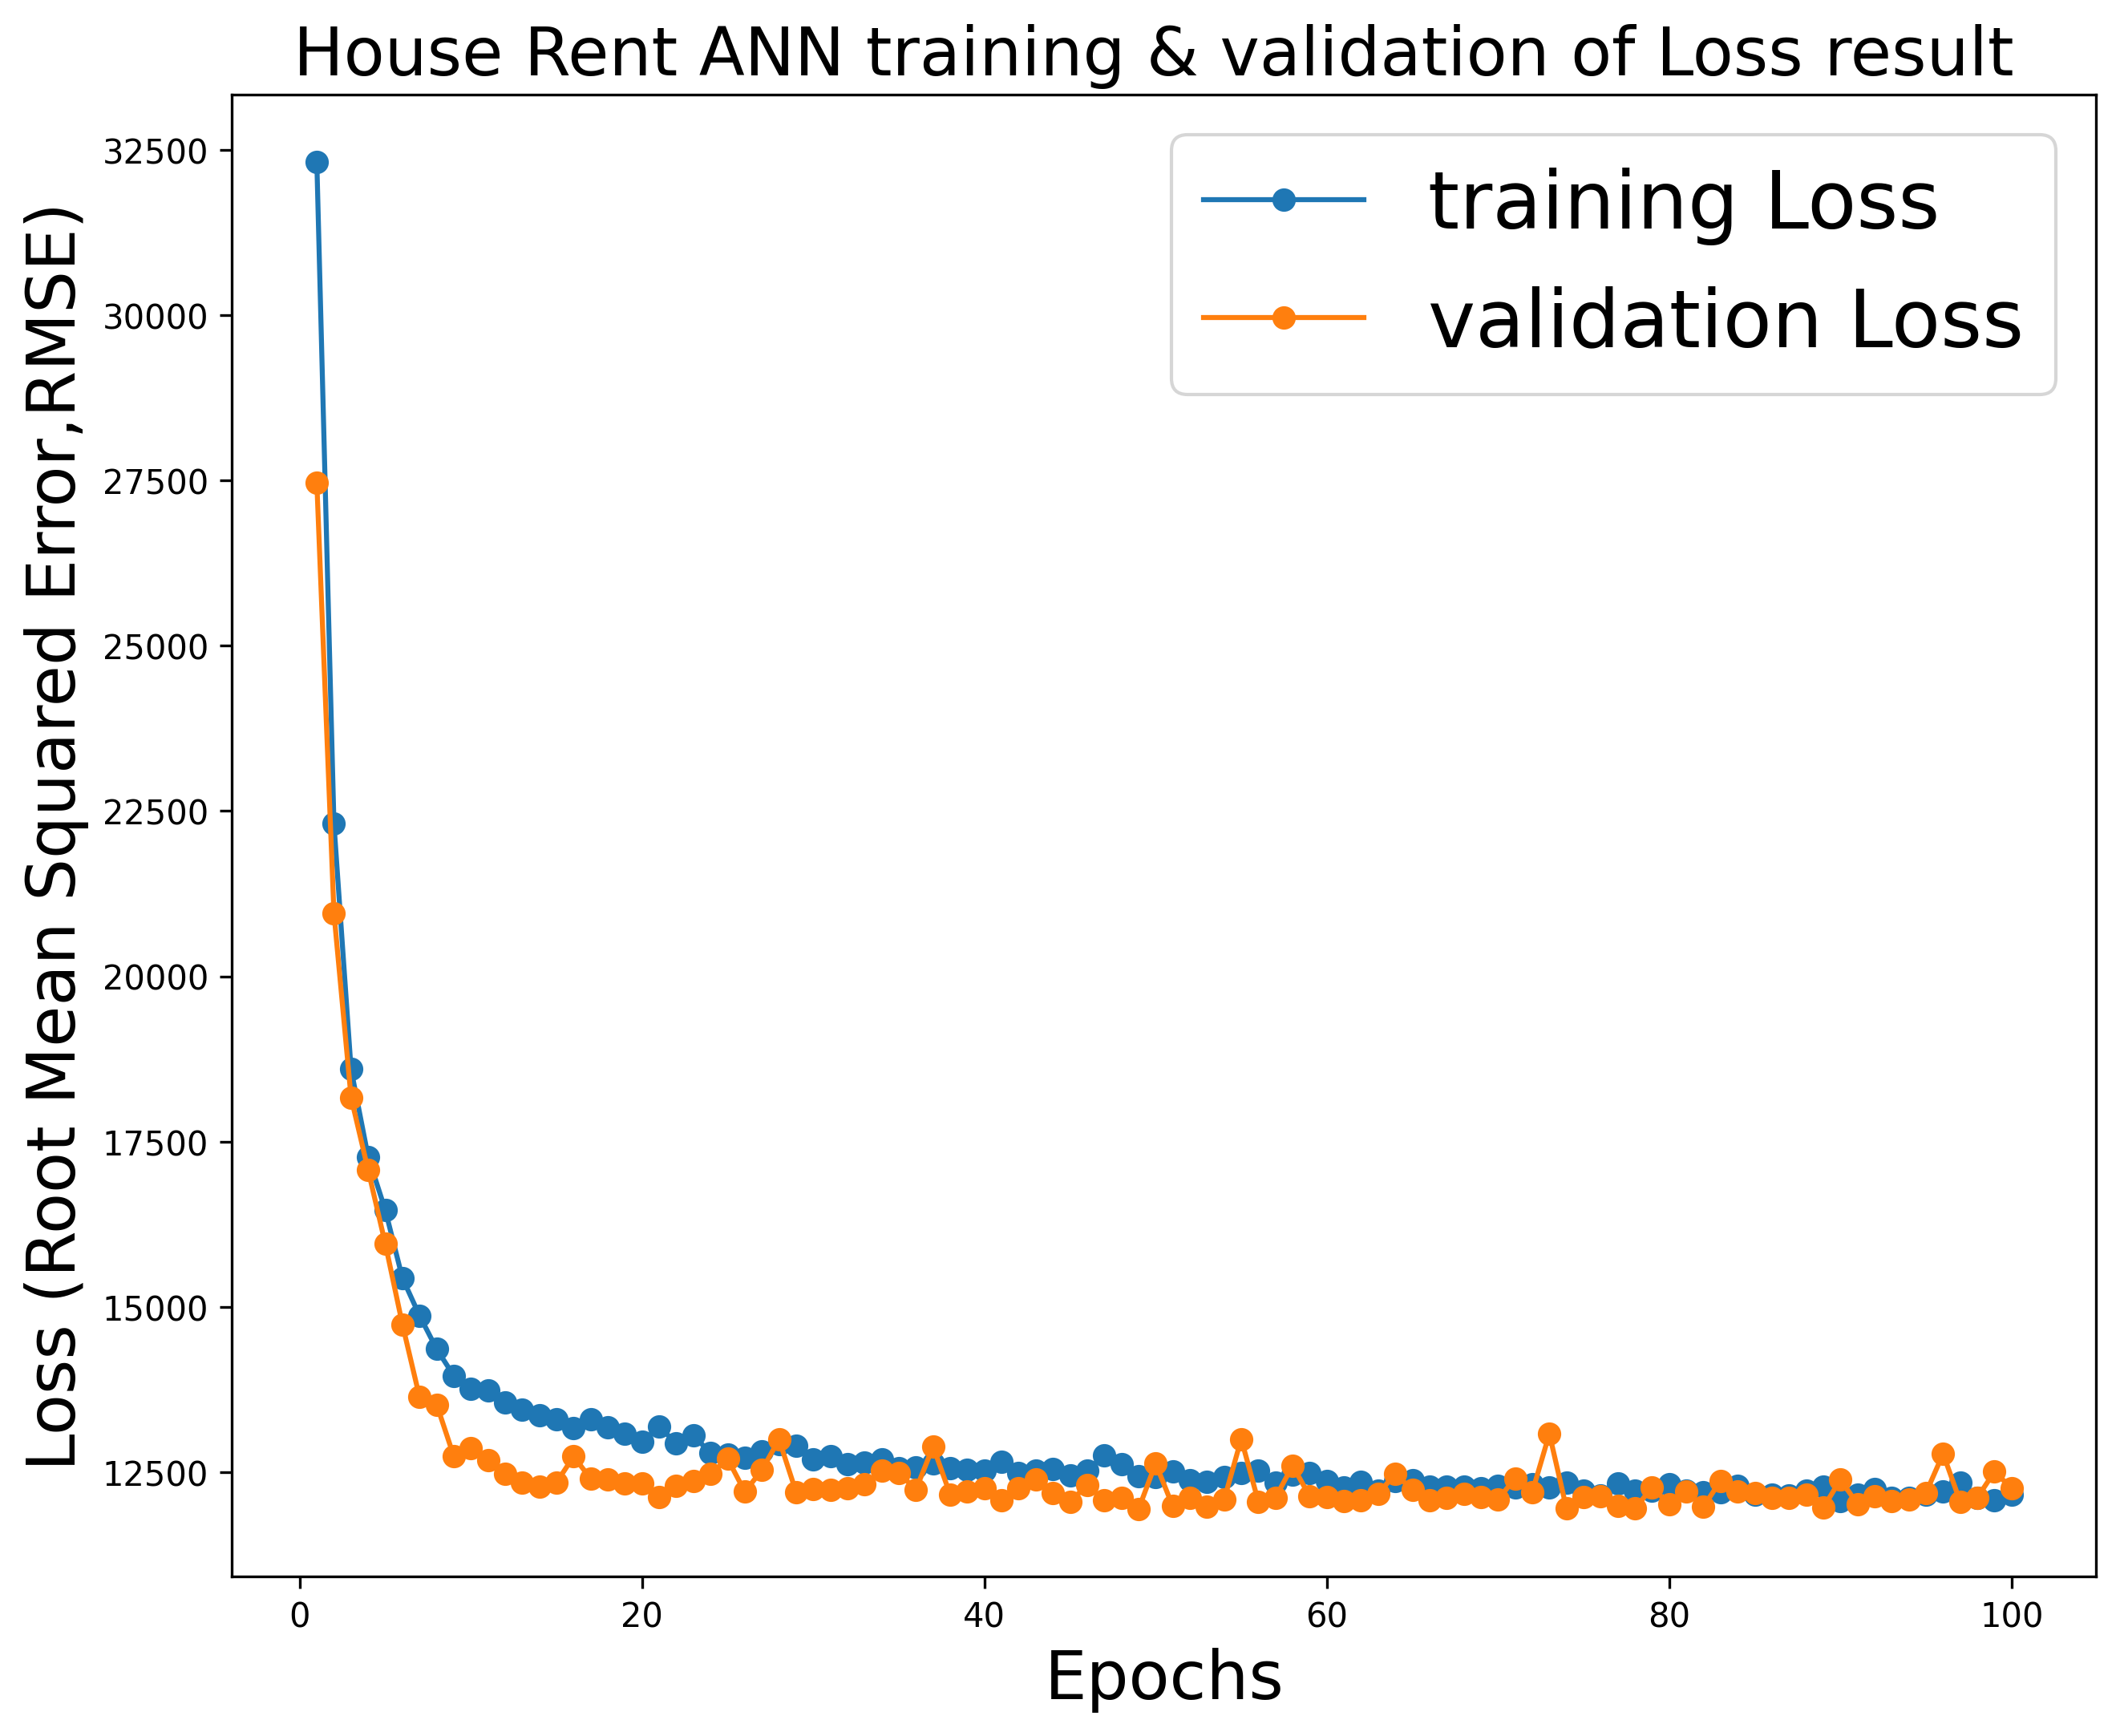

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(10,8),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('House Rent ANN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [17]:
# 6.1 Create the model
clear.clear_session()
model2=Sequential()

# 6.2 Add input layer & first hidden layer
model2.add(Dense(units=24, input_dim=12, activation='relu')) #12 features

# 6.3 Add second hidden layer
model2.add(Dense(units=48, activation='relu')) #上一層兩倍

# 6.5 Add output layer
model2.add(Dense(units=1, activation='linear'))

# 6.6 Compile the defined Net
#opt=SGD(learning_rate=0.001,momentum=0.5)

opt=Adam(learning_rate=0.005,beta_1=0.9) #adem為主，可改 l.r b_1:改
model2.compile(loss='my_RMSE', optimizer=opt, metrics=['MAPE']) #loss會照設定跑

# Finally check the model 
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)

# 7.1 Store in the history for more useful information
history=model2.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation)) #因為y是連續，所以指標適用loss

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(10,8),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('House Rent ANN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()